<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [0]:
col_names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, names = col_names)
df.head(100)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,00171,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,00180,1,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
98,a,22.50,11.000,y,p,q,v,3.000,t,f,0,t,g,00268,0,-


In [0]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
df=df.replace('?',np.NaN)

## Stretch 1: make data format easier to understand/manipulate!

In [0]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
# Generate list of numerical variable and catgorical variable
def listComplementElements(list1, list2):
    storeResults = []
    for num in list1:
        if num not in list2: # this will essentially iterate your list behind the scenes
            storeResults.append(num)
    return storeResults

num_var = ['A2','A3','A8','A11','A14'] # numerical variable name list
cat_var = listComplementElements(col_names,num_var) # categorical variable name list
print(cat_var)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A15', 'A16']


In [0]:
# Now change data format
for item in num_var:
  df[item]=pd.to_numeric(df[item])

for item in cat_var:
  df[item] = df[item].astype(str) 

print(df.loc[0,'A1'])
print(type(df.loc[0,'A1']))
print('\n')
print(df.loc[0,'A2'])
print(type(df.loc[0,'A2']))

In [0]:
df.head(100)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,171.0,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,180.0,1,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
98,a,22.50,11.000,y,p,q,v,3.000,t,f,0,t,g,268.0,0,-


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
num_var.append('A16')
print(num_var)
df_subset =df[num_var]
df_subset.head()

['A2', 'A3', 'A8', 'A11', 'A14', 'A16']


,A2,A3,A8,A11,A14,A16
0,30.83,0.000,1.25,1,202.0,+
1,58.67,4.460,3.04,6,43.0,+
2,24.50,0.500,1.50,0,280.0,+
3,27.83,1.540,3.75,5,100.0,+
4,20.17,5.625,1.71,0,120.0,+


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


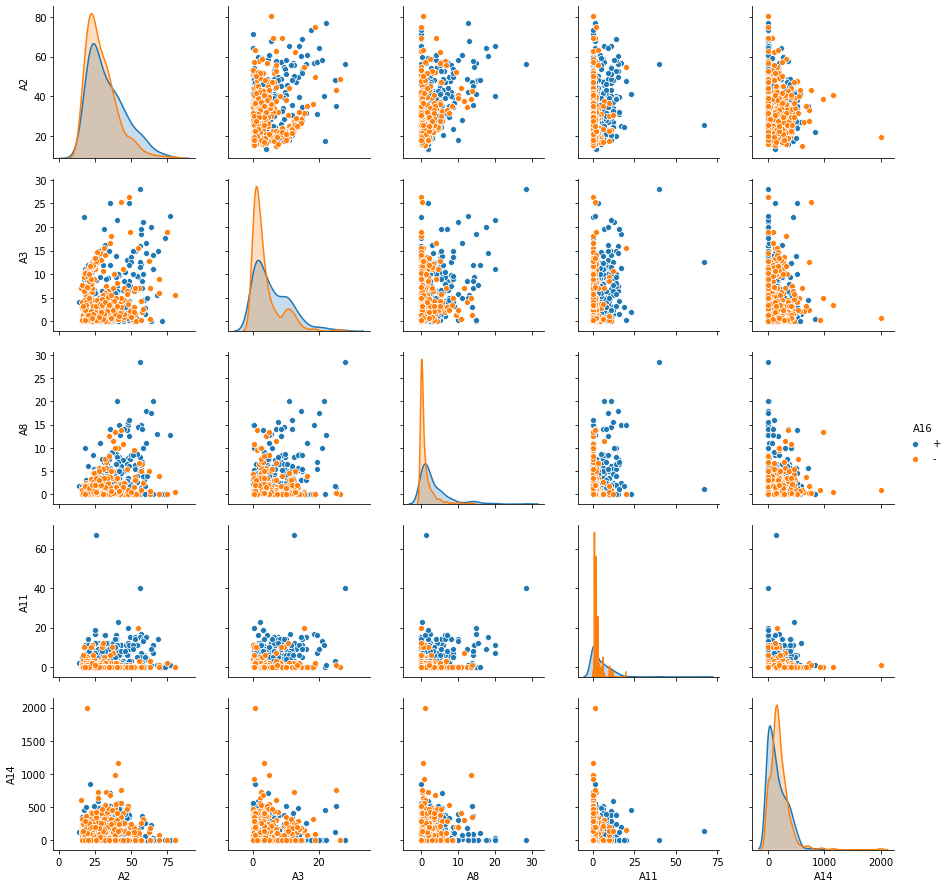

In [0]:
# exploring data
sns.pairplot(df_subset, hue='A16')

In [0]:
# look into numerical variables:
# All the statitic analysis are based on alpha=0.05, Confidence level =95%
# split the data frame into two according to A16 values
df_pos = df[df['A16']=='+']
df_neg = df[df['A16']=='-']
print(df_pos.shape)

# H0: there is no significant difference betwwen parameter 'A3' for these two dataset grouped by A16
t_stat,p = stats.ttest_ind(df_pos['A3'], df_neg['A3'], equal_var = False, nan_policy='omit')
print(t_stat, p)
print('Reject null hypothesis based on p-value=',p,'\n','There is significant difference between the mean of A3 between people who were approved with credit and who weren not!') 

# H0: there is no significant difference betwwen parameter 'A8' for these two dataset grouped by A16
t_stat,p = stats.ttest_ind(df_pos['A8'], df_neg['A8'], equal_var = False, nan_policy='omit')
print(t_stat, p)
print('Reject null hypothesis based on p-value=',p,'\n','There is significant difference between the mean of A8 between people who were approved with credit and who weren not!') 

# H0: there is no significant difference betwwen parameter 'A11' for these two dataset grouped by A16
t_stat,p = stats.ttest_ind(df_pos['A11'], df_neg['A11'], equal_var = False, nan_policy='omit')
print(t_stat, p)
print('Reject null hypothesis based on p-value=',p,'\n','There is significant difference between the mean of A11 between people who were approved with credit and who weren not!') 
print(df_neg.shape)


(307, 16)
5.392530906223675 1.0158807568737146e-07
Reject null hypothesis based on p-value= 1.0158807568737146e-07 
 There is significant difference between the mean of A3 between people who were approved with credit and who weren not!
8.38006008674286 7.425348666782441e-16
Reject null hypothesis based on p-value= 7.425348666782441e-16 
 There is significant difference between the mean of A8 between people who were approved with credit and who weren not!
10.6384190682749 4.310254123415665e-23
Reject null hypothesis based on p-value= 4.310254123415665e-23 
 There is significant difference between the mean of A11 between people who were approved with credit and who weren not!
(383, 16)


In [0]:
# Use two-way chi2 test to see if these two variables are independent
# look into categorical variables
table = pd.crosstab(df['A7'],df['A16'])
print(table)
# H0: different category with "A7' and credit approval/disapproval are independent
chi2, p, dof, expected= stats.chi2_contingency(table)
print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')
print('Expected: \n', np.array(expected))
print('\n','Based on Chi2 test, p=',p, ', reject null hypothesis. So there are dependence between different category with A7 and credit approval/disapproval.')


A16    +    -
A7           
bb    25   34
dd     2    4
ff     8   49
h     87   51
j      3    5
n      2    2
nan    4    5
o      1    1
v    169  230
z      6    2
Chi-squared: 45.034343981004014
p-value: 9.092647404039827e-07
Degree of freedom: 9
Expected: 
 [[ 26.25072464  32.74927536]
 [  2.66956522   3.33043478]
 [ 25.36086957  31.63913043]
 [ 61.4         76.6       ]
 [  3.55942029   4.44057971]
 [  1.77971014   2.22028986]
 [  4.00434783   4.99565217]
 [  0.88985507   1.11014493]
 [177.52608696 221.47391304]
 [  3.55942029   4.44057971]]

 Based on Chi2 test, p= 9.092647404039827e-07 , reject null hypothesis. So there are dependence between different category with A7 and credit approval/disapproval.


In [0]:
# look into another categorical variables
# note I looked A9, A10, all has small p
table = pd.crosstab(df['A1'],df['A16'])
print(table)
# H0: different category with "A1' and credit approval/disapproval are independent
chi2, p, dof, expected= stats.chi2_contingency(table)
print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')
print('Expected: \n', np.array(expected))
print('\n','Based on Chi2 test, p=',p, ', cannot reject null hypothesis. So different categories with A1 doesnot impact A16 (credit approval/disapproval).')


A16    +    -
A1           
a     98  112
b    206  262
nan    3    9
Chi-squared: 2.2909673396997023
p-value: 0.3180700396919805
Degree of freedom: 2
Expected: 
 [[ 93.43478261 116.56521739]
 [208.22608696 259.77391304]
 [  5.33913043   6.66086957]]

 Based on Chi2 test, p= 0.3180700396919805 , cannot reject null hypothesis. So different categories with A1 doesnot impact A16 (credit approval/disapproval).


In [0]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


## Stretch part 2:use functions to batch analyze columns

In [0]:
# split df into two dataframe automatically, given the last column of df is the dependent variable y
def split_df_into_num_cat_subset(df): 
  num_vars = []
  cat_vars =[]
  for i, value in enumerate(df.dtypes):
    # print(i, value)
    var_name = 'A'+str(i+1)
    if value=='object':
      cat_vars.append(var_name)
    elif (value=='int64') or (value =='float64'):
      num_vars.append(var_name)
    else: 
      print('Wrong data type')

  print('Numerical variables are:',num_vars)
  print('Categorical variables are:',cat_vars)
  if df.columns[-1] in cat_vars:
    num_vars.append(df.columns[-1])
  elif df.columns[-1] in num_vars:
    cat_vars.append(df.columns[-1])
  else: print('Y column data type is not recognizable.')
 # split the dataframe into two 
  df_num = df[num_vars] # numerical
  df_cat = df[cat_vars] # categorical
  return df_num, df_cat


In [0]:
# The function calculate t-tests on all of the appropriate column combinations from the dataset.
def ttest_df_columns(df, alpha):
  df_pos = df[df.iloc[:,-1]=='+']
  df_neg = df[df.iloc[:,-1]=='-']
  var_names = list(df.columns)
  for item in var_names[:-2]:
    print('Variable', item,':')
    # H0: there is no significant difference betwwen parameter 'A3' for these two dataset grouped by A16
    t_stat,p = stats.ttest_ind(df_pos[item], df_neg[item], equal_var = False, nan_policy='omit')
    print('t_stat=', round(t_stat,3), ', p-value=', p)
    if p<alpha: 
      print('Reject null hypothesis. \n', \
            'There is a significant difference between the means of {item} between people who were approved with credit and who weren not!') 
    else:
      print('Cannot reject null hypothesis. \n', \
            'There is no significant difference between the means of {item} between people who were approved with credit and who weren not!') 
    print('\n')

In [0]:
# This function does chi^2 tests on all of the appropriate column combinations from the dataset.
def chi2_df_columns(df, alpha):
  df_pos = df[df.iloc[:,-1]=='+']
  df_neg = df[df.iloc[:,-1]=='-']
  var_names = list(df.columns)
  for item in var_names[:-2]:
    table = pd.crosstab(df[item],df.iloc[:,-1])
    # print(table)
    # H0: different category with "A1' and credit approval/disapproval are independent
    chi2, p, dof, expected= stats.chi2_contingency(table)
    print('Variable', item,':')
    print(f'Chi-squared: {chi2}')
    print(f'p-value: {p}')
    print(f'Degree of freedom: {dof}')
    # print('Expected: \n', np.array(expected))
    if p < alpha: 
      print('Reject null hypothesis. \n', \
            'So different categories in',item, 'does impact the y respondent variable') 
    else:
      print('Cannot reject null hypothesis. \n', \
            'So different categories in',item, 'does NOT impact the y respondent variable')
    print('\n')

In [0]:
# now call these two functions to do a ttest for multiple columns
df_num, df_cat = split_df_into_num_cat_subset(df)
ttest_df_columns(df_num, 0.05)

Numerical variables are: ['A2', 'A3', 'A8', 'A11', 'A14']
Categorical variables are: ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A15', 'A16']
Variable A2 :
Chi-squared: 375.8816005424716
p-value: 0.14571648320428404
Degree of freedom: 348
Cannot reject null hypothesis. 
 So different categories in A2 does NOT impact the y respondent variable


Variable A3 :
Chi-squared: 239.04991842769334
p-value: 0.11536083336504771
Degree of freedom: 214
Cannot reject null hypothesis. 
 So different categories in A3 does NOT impact the y respondent variable


Variable A8 :
Chi-squared: 214.1530911298994
p-value: 6.169823802314774e-06
Degree of freedom: 131
Reject null hypothesis. 
 So different categories in A8 does impact the y respondent variable


Variable A11 :
Chi-squared: 203.41293121441765
p-value: 2.441239211959569e-31
Degree of freedom: 22
Reject null hypothesis. 
 So different categories in A11 does impact the y respondent variable




In [0]:
chi2_df_columns(df_cat, 0.05)

Variable A1 :
Chi-squared: 2.2909673396997023
p-value: 0.3180700396919805
Degree of freedom: 2
Cannot reject null hypothesis. 
 So different categories in A1 does NOT impact the y respondent variable


Variable A4 :
Chi-squared: 27.415923419169303
p-value: 4.816178195213086e-06
Degree of freedom: 3
Reject null hypothesis. 
 So different categories in A4 does impact the y respondent variable


Variable A5 :
Chi-squared: 27.415923419169303
p-value: 4.816178195213086e-06
Degree of freedom: 3
Reject null hypothesis. 
 So different categories in A5 does impact the y respondent variable


Variable A6 :
Chi-squared: 98.32549200027748
p-value: 9.921414011107433e-15
Degree of freedom: 14
Reject null hypothesis. 
 So different categories in A6 does impact the y respondent variable


Variable A7 :
Chi-squared: 45.034343981004014
p-value: 9.092647404039827e-07
Degree of freedom: 9
Reject null hypothesis. 
 So different categories in A7 does impact the y respondent variable


Variable A9 :
Chi-squa

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

ANSWER: 

I did t-tests on A3, A8, A11 grouped by A16, with null hypothesis that there is no difference between the means of these variables in the two groups (credit approval vs. credit disapproval). All three returned small p-value, enable us to reject the null. So the means of A3, A8, A11 are quite different for the two groups. So A3, A8, A11 are important parameters to consider for assessing people's credit application.

I did two-way chi-square test on contingency table formed by A7, A16. Based on the result of p= 3.6e-07, we reject null hypothesis, and conclude that there are dependence between different category with A7 and credit approval/disapproval. However, for A1,Chi2 test give p=0.58, so we cannot reject the null hypothesis, and we can conclude different categories with A1 does not impact A16 (credit approval/disapproval).

If I have to say there is a challenging part of this sprint, it is how to make my plot nicer!

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# See completed stretch part 1 and part 2 inline 

## stretch part 3:

In [0]:
# calculate confidence interval on means of selected varaibles
# df_num
def CI_multiple_columns(df, alpha):
  n = df.shape[0]
  dof = n-1
  sample_mean = np.mean(df)
  sample_std = np.std(sample_mean, ddof=1) # Sample Standard Deviation
  std_err = sample_std/n**.5 # Standard Error

  CI = stats.t.interval(alpha, dof, loc=sample_mean, scale=std_err) 
  # t.interval returns confidence interval with equal areas around the location 
  # parameter, default is 0 (median), scale is the parameter to be multiplied 
  # by t-statistic
  return CI
 

Text(0, 0.5, 'Means and 95% CI bounds')

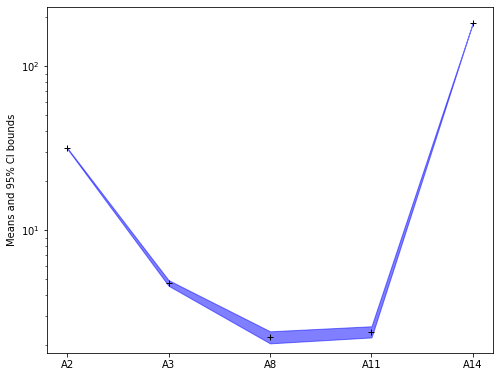

In [113]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(list(range(0, mean.shape[0])), ub, lb,\
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)


(a,b) = CI_multiple_columns(df_num, 0.05) # extract value from a tuple
print(a,b)
means = np.mean(df_num) 
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(2, 1, 1)
plot_mean_and_CI(means, a, b, color_mean='k+', color_shading='b')
ax.set_yscale('log')
ax.set_ylabel('Means and 95% CI bounds')